In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
### First we construct the basis states
### We use a Fock space which we truncate to include at most two split flips
### For N = L^2 sites this will have a total dimensionality of 1 +N(N-1)/2 

### We can label the states by the following scheme for index i
### i = 0 corresponds to the classical Neel state 
### We then choose two integers (j,k) for j,k = 0, ... , N-1 with j < k
### These correspond to a spatial coordinate of j = x + y*L

def flatten_coord(r,L):
    ### r = (x,y)
    x = r[0]
    y = r[1]
    return x + L*y

def unflatten_coord(i,L):
    return [i % L , i //L]

### This method will, given a linear system size, construct a set of basis vectors and a list of their indices according to the scheme above
### For convenience we will put the ground state last since it otherwise ofsets the excited state vector indexing by one
def construct_basis(L):
    N = L*L
    dim = int( 1 + N*(N-1)/2 )
    
    vecs = [] ### A list of numpy vectors corresponding to basis vectors
    index_pairs = [] ### A list of the indices of each corresponding basis vector
    
    gs = np.zeros(dim,dtype=complex)
    gs[0] = 1.
    vecs.append(gs)
    index_pairs.append([]) ### We encode the ground state excitation site indices as a null list
    
    index = 1 ### This will increment and be the index of the nonzero element in the basis vector
    
    for i in range(1,N):
        for j in range(0,i):
            tmp = np.zeros(dim,dtype=complex)
            tmp[index] = 1.
            
            vecs.append(tmp)
            index_pairs.append([i,j])
            index += 1
            
    return vecs, index_pairs

### This method will produce an image of the basis functions based on where the spin flips are located
### Specifically, it will return a two-dimensional array with the corresponding values of sigma_z on each site
def Sz_map(index_pair,L):
    sz = np.zeros((L,L))
    
    ### First we put the spin texture to the ground state spin texture
    for x in range(L):
        for y in range(L):
            sz[x,y] = (-1.)**(x+y)
            
    ### Unless it is the ground state we now identify the coordinates of the spin flips and flip the spin values there
    if index_pair != []:
        i = index_pair[0]
        j = index_pair[1]
        
        [x1,y1] = unflatten_coord(i,L)
        [x2,y2] = unflatten_coord(j,L)
        
        sz[x1,y1] *= -1.
        sz[x2,y2] *= -1.
            
    return sz


### This returns the value of the operator Sz Sz on sites i,j
### We assume the basis constructor has already been called and we pass the vectors and indices 
def SzSz(i,j,indices):
    dim = len(indices)
    
    mat = np.eye(dim,dtype=complex) ### The action is identity on most basis states

    for n in range(dim):
        ### We retrieve the value of Sz_j Sz_k for configuration n 
        sz = Sz_map(indices[n],L)
        
        [x1,y1] = unflatten_coord(i,L)
        [x2,y2] = unflatten_coord(j,L)
        
        mat[n,n] = 0.25*sz[x1,y1]*sz[x2,y2]
        
    return mat
        
    

In [48]:
L = 4 ### Linear system size extension
N = L*L ### Number of sites in system

vecs,indices = construct_basis(L)

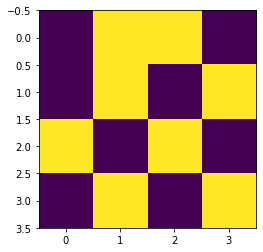

In [49]:
plt.imshow(Sz_map([0,L],L))
plt.show()

In [58]:
i = flatten_coord([0,0],L)
j = flatten_coord([0,1],L)

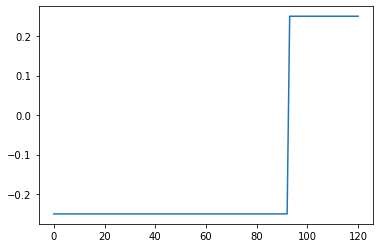

In [59]:
plt.plot(np.linalg.eigh(SzSz(i,j,indices))[0])
plt.show()